In [1]:
#Import everything
import Main.test_manifold_algorithms as tma
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from Helpers.regression_helpers import *

# Baseline Visualization

In [33]:
pipeline_baselines = pd.read_csv("/yunity/arusty/Graph-Manifold-Alignment/Results/ManifoldData/PipelineBasline.csv", index_col=0)
pipeline_baselines.sample(5)

,csv_file,Method,Random Forest OOB,Random Forest Emb,Nearest Neighbor,Nearest Neighbor (F1 score or RMSE),Random Forest (F1 score or RMSE)
29,Hydrodynamics.csv,Pipeline Baseline,0.994108,0.996026,0.648378,0.584835,0.062172
60,AutoMPG.csv,Pipeline Baseline,0.883879,0.805347,0.831464,0.439705,0.472548
11,Automobile.csv,Pipeline Baseline,0.886159,0.617242,0.692114,0.375839,0.419053
54,ConcreteCompressiveStrength.csv,Pipeline Baseline,0.913046,0.916713,0.669205,0.588612,0.295350
42,EnergyEfficiency.csv,Pipeline Baseline,0.965247,0.976497,0.911774,0.303568,0.156680


In [2]:
baselines_cross = pd.read_csv("/yunity/arusty/Graph-Manifold-Alignment/Results/RegressionData/BaselineData.csv")
baselines_in_sample = pd.read_csv("/yunity/arusty/Graph-Manifold-Alignment/Results/RegressionData/BaselineDataOnSample.csv")
baselines = pd.read_csv("/yunity/arusty/Graph-Manifold-Alignment/Results/RegressionData/BaselineDataTrainTest.csv", index_col=0).rename(columns = {"KNN_BL_A": "A_Classification_Score", "KNN_BL_B": "B_Classification_Score"})
baselines.sample(5)

,csv_file,split,KNN,A_Classification_Score,B_Classification_Score
387,FacebookMetrics,random,72,0.590953,0.390651
340,AutoMPG,skewed,2,0.661566,0.834183
365,FacebookMetrics,even,52,0.441122,0.490596
324,AutoMPG,random,34,0.786794,0.590314
190,CommunityCrime,distort,2,0.480449,0.518701


In [3]:
baselines_grouped = baselines.groupby(by = ["csv_file", "split"]).max().drop(columns = ["KNN"]).reset_index()
try:
    baselines_grouped.drop(columns = ["Unnamed: 0"], inplace= True)
except:
    print("Didn't need to run")

baselines_grouped[baselines_grouped["csv_file"] == "Hydrodynamics"]

Didn't need to run


,csv_file,split,A_Classification_Score,B_Classification_Score
45,Hydrodynamics,distort,0.731098,0.583344
46,Hydrodynamics,even,-0.132785,0.971827
47,Hydrodynamics,random,0.904653,-0.135059
48,Hydrodynamics,skewed,-0.134976,0.916070
49,Hydrodynamics,turn,0.731098,0.730979


<Axes: xlabel='csv_file'>

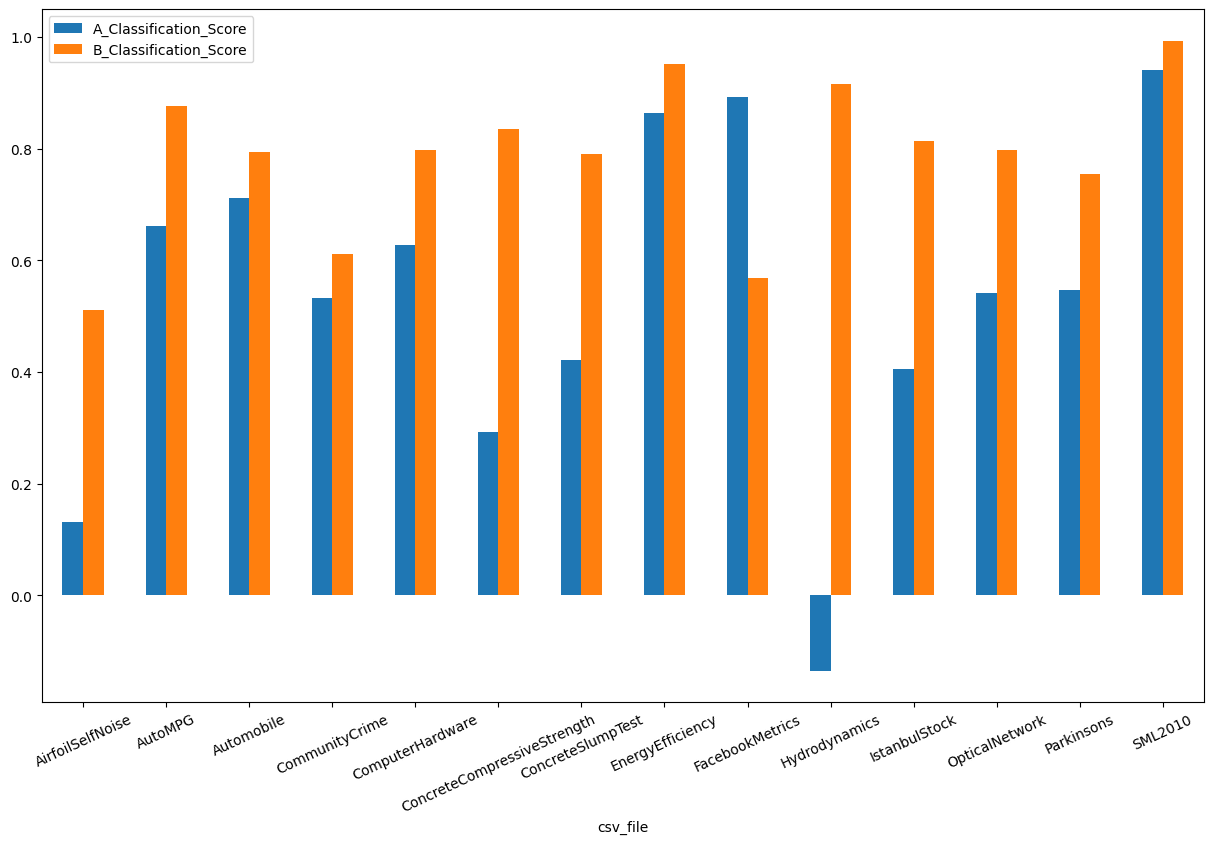

In [4]:
baselines_grouped[baselines_grouped["split"] == "skewed"].set_index("csv_file").plot(kind = "bar", subplots=False, figsize=(15,9), rot= 25)
#Keep in mind that these are trained on one domain, then tested on the other. 

# Model Comparison

In [5]:
reg_df = read_json_files_to_dataframe("/yunity/arusty/Graph-Manifold-Alignment/Results/RegressionData")
print(f"File Length: {len(reg_df)}")
reg_df.sample(5)


File Length: 1229


,method,csv_file,split,Percent_of_Anchors,Best_Params,CE,FOSCTTM,Random Forest OOB,Random Forest Emb,Nearest Neighbor,Nearest Neighbor (F1 score or RMSE),Random Forest (F1 score or RMSE),GRAE,Parameter STD
648,RF-SPUD,FacebookMetrics,distort,0.3,"{'knn': 2, 'OD_method': 'default', 'agg_method...","{'42': -0.14551579875676413, '1738': -0.266767...","{'42': 0.00017549229670441792, '1738': 0.00013...","{'42': -0.01305148924997579, '1738': -0.383420...","{'42': -0.20889052303125366, '1738': -0.203529...","{'42': 0.21200488244090998, '1738': -0.0212279...","{'42': 0.6946590631250203, '1738': 0.881479895...","{'42': 0.8604059984310971, '1738': 0.956928219...","{'42': {'RF-OOB': -0.10174993258095055, 'KNN':...",{}
634,SPUD,AutoMPG,even,0.3,"{'knn': 50, 'OD_method': 'default', 'agg_metho...",{'42': 0.6361879486579856},{'42': 0.0},{'42': 0.7573481360901451},{'42': 0.6802105924865454},{'42': 0.6719758486004599},{'42': 0.5242487462979503},{'42': 0.5176265302639879},"{'42': {'RF-OOB': 0.7876715009675327, 'KNN': 0...","{'knn': 0.12268469295332166, 'OD_method': 0.08..."
363,RF-SPUD,CommunityCrime,random,0.3,"{'knn': 2, 'OD_method': 'default', 'agg_method...","{'42': 0.3865472016692246, '1738': -0.24498383...","{'42': 6.53917620464201e-06, '1738': 5.7846558...","{'42': 0.5631976479412022, '1738': 0.514374778...","{'42': 0.4731586057584034, '1738': 0.505070729...","{'42': 0.5165405422012048, '1738': 0.528172666...","{'42': 0.6531316463820175, '1738': 0.685040974...","{'42': 0.6818057227216793, '1738': 0.701611291...","{'42': {'RF-OOB': 0.532405784799955, 'KNN': 0....",{}
646,SPUD,FacebookMetrics,turn,0.3,"{'knn': 12, 'OD_method': 'default', 'agg_metho...","{'42': -0.04857519269696908, '1738': -0.048575...","{'42': 4.0812162024283235e-06, '1738': 4.08121...","{'42': 0.14976673608392777, '1738': 0.08238303...","{'42': 0.31870323849949567, '1738': 0.50505707...","{'42': -0.04472411126617182, '1738': -0.067300...","{'42': 0.7998540569525406, '1738': 0.901144489...","{'42': 0.6459190677428054, '1738': 0.613661154...","{'42': {'RF-OOB': 0.3497774093123668, 'KNN': 0...","{'knn': 0.0217272199033663, 'OD_method': 0.003..."
677,RF-SPUD,FacebookMetrics,even,0.3,"{'knn': 2, 'OD_method': 'default', 'agg_method...",{'42': 0.43167414458810305},{'42': 6.121824303642486e-05},{'42': 0.24446213365621583},{'42': 0.3881322628943117},{'42': 0.7033039451104575},{'42': 0.4262514101715665},{'42': 0.612123030955778},"{'42': {'RF-OOB': 0.37297597887830525, 'KNN': ...",{}


In [6]:
proc_reg_df = reg_df.drop(columns = ["Best_Params", "Parameter STD"])

#Average out the random seeds
for columns in ["CE", "FOSCTTM", "Random Forest OOB", "Random Forest Emb", "Nearest Neighbor", "Nearest Neighbor (F1 score or RMSE)", "Random Forest (F1 score or RMSE)"]:
    proc_reg_df[columns] = [np.mean(list(d.values())) for d in proc_reg_df[columns].values]

proc_reg_df["Combined_Metric"] = proc_reg_df["CE"] - proc_reg_df["FOSCTTM"]
proc_reg_df = proc_reg_df.merge(baselines_grouped, how = "left")

In [7]:
proc_reg_df.sample(3)

,method,csv_file,split,Percent_of_Anchors,CE,FOSCTTM,Random Forest OOB,Random Forest Emb,Nearest Neighbor,Nearest Neighbor (F1 score or RMSE),Random Forest (F1 score or RMSE),GRAE,Combined_Metric,A_Classification_Score,B_Classification_Score
1198,SPUD,AirfoilSelfNoise,even,0.3,-0.352525,0.086674,-0.032356,-0.001067,-0.018745,1.035573,1.026549,"{'42': {'RF-OOB': -0.0032987879215371496, 'KNN...",-0.439199,0.460536,0.236131
34,NAMA,ComputerHardware,turn,0.3,0.032948,0.000595,0.685430,0.518746,0.589668,0.661538,0.652444,"{'42': {'RF-OOB': 0.6378068241292143, 'KNN': 0...",0.032352,0.750700,0.752940
105,MASH-,Hydrodynamics,skewed,0.3,0.629184,0.358808,0.287898,-0.336333,-0.048069,0.823137,0.929468,"{'42': {'RF-OOB': 0.14051142466283284, 'KNN': ...",0.270375,-0.134976,0.916070


In [8]:
#This helps me to see where my tests have failed
results_df = plt_methods_by_CSV_max(df = proc_reg_df, metric = "Random Forest OOB", return_df=True).head(13) #, split = "skewed"
results_df

,csv_file,SSMA,MAGAN,DTA,SPUD,MASH,MASH-,RF-MASH-,NAMA,RF-NAMA,PCR,JLMA,MASH_RF,MALI_RF,MALI,SPUD_RF,BL_A,BL_B
0,IstanbulStock,0.680923,0.569308,0.705850,0.577943,0.658705,0.864028,NaN,0.454503,0.010724,0.673788,0.734839,NaN,-0.065346,0.310961,0.764479,0.744236,0.813411
1,Hydrodynamics,0.821178,0.748517,0.698600,0.836765,0.687828,0.699506,0.942376,0.238124,0.151480,0.635655,0.864102,0.936298,-0.146696,0.636120,0.921095,0.904653,0.971827
2,ConcreteSlumpTest,0.549525,0.549586,0.629340,0.682349,0.725379,0.720537,0.771069,0.473491,0.396304,0.531518,0.886699,0.826322,-0.077662,0.800048,0.736710,0.807941,0.856885
3,Automobile,0.502089,0.735603,0.753711,0.780318,0.732445,0.783255,NaN,0.773912,0.299653,0.766941,0.811098,NaN,-0.004982,0.662132,0.848424,0.749043,0.809653
4,AirfoilSelfNoise,0.619399,0.431465,0.700234,0.769754,0.740675,0.844413,0.818670,0.284405,-0.095231,0.675820,0.822892,NaN,-0.076214,-0.039089,0.119716,0.914960,0.920161
5,OpticalNetwork,0.636408,0.699220,0.717461,0.810769,0.746182,0.759065,0.946283,0.822363,0.017212,0.693662,0.800007,0.945786,-0.069036,0.304691,0.742739,0.828350,0.934714
6,FacebookMetrics,0.752303,0.336870,0.727294,0.750302,0.800681,0.874274,0.728243,0.481856,-0.095869,0.720300,0.464518,0.480651,-0.160206,0.140455,0.457261,0.893248,0.806380
7,ComputerHardware,0.709996,0.709258,0.728898,0.751473,0.829993,0.824464,0.785939,0.685430,0.113527,0.764483,0.850338,0.835081,-0.163262,0.668598,0.667248,0.921808,0.796896
8,AutoMPG,0.674557,0.831094,0.735398,0.844954,0.869319,0.863046,0.884040,0.839507,0.039760,0.768650,0.886674,NaN,-0.022647,0.756940,0.817740,0.875136,0.876258
9,CommunityCrime,0.261016,0.583580,0.689580,0.596364,0.885923,0.880368,0.662436,0.075647,-0.064281,0.534992,0.683720,0.670108,-0.055358,0.005141,0.620322,0.611469,0.611469


In [9]:
# Visualization
results_df.drop(columns=["csv_file"]).mean(axis = 0).sort_values()

MALI_RF    -0.080890
RF-NAMA     0.049353
MALI        0.338712
NAMA        0.522443
SSMA        0.625115
MAGAN       0.647438
SPUD_RF     0.668730
PCR         0.688479
DTA         0.719457
SPUD        0.746049
MASH        0.784130
JLMA        0.789903
MASH-       0.797253
MASH_RF     0.808013
BL_A        0.826220
RF-MASH-    0.831596
BL_B        0.841477
dtype: float64

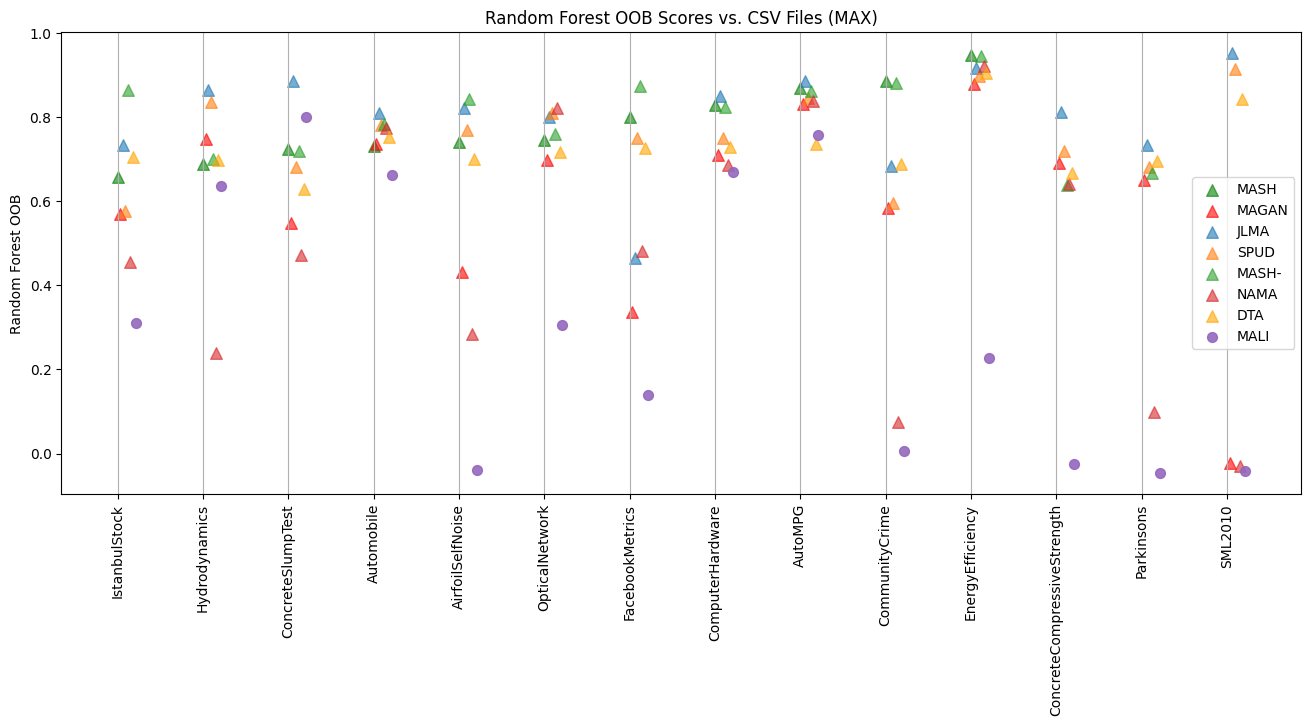

In [10]:
plt_methods_by_CSV_max(df = proc_reg_df, metric = "Random Forest OOB",
                    plot_methods=["MASH", "NAMA", "MALI", "SPUD", "MASH-", "BL_A-B", "BL_B-A", "MAGAN", "JLMA", "DTA"])

In [11]:
proc_reg_df["method"].nunique()

15

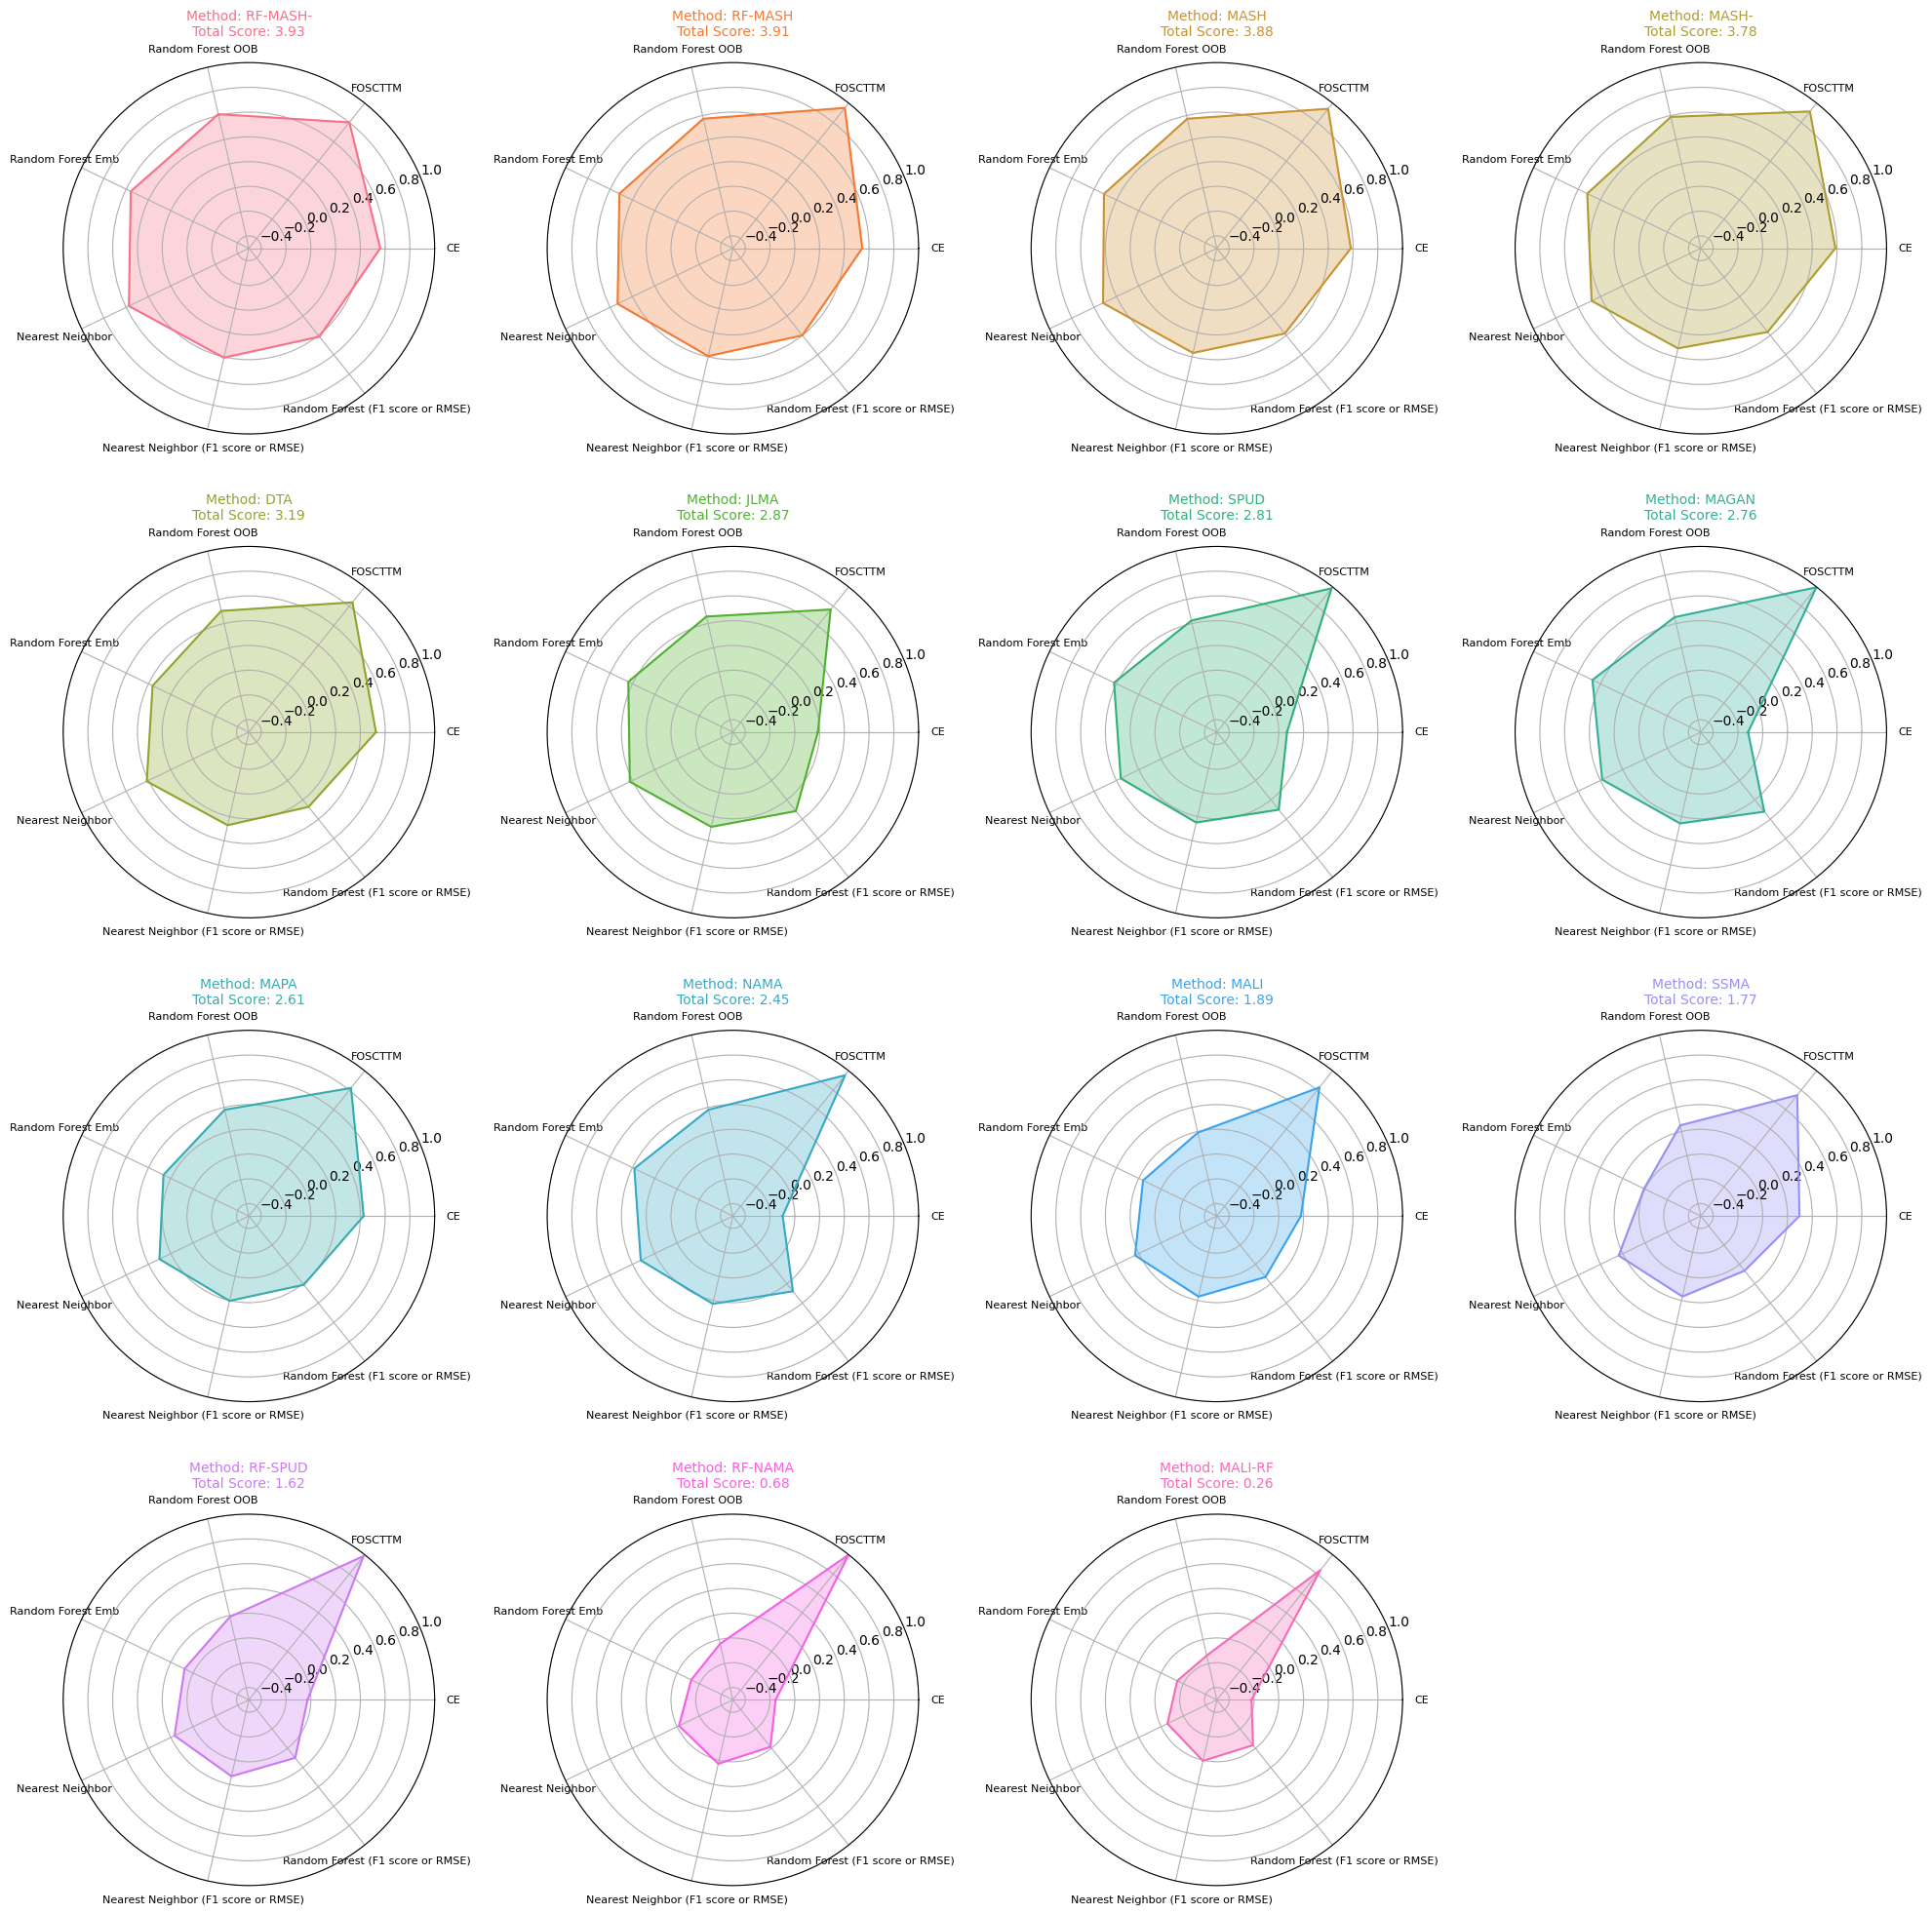

In [12]:
plot_radial(proc_reg_df, ['CE', 'FOSCTTM', 'Random Forest OOB', 'Random Forest Emb', 'Nearest Neighbor',
                          'Nearest Neighbor (F1 score or RMSE)', 'Random Forest (F1 score or RMSE)'])

## Veiw GRAE

In [13]:
proc_reg_df.sample(2)

,method,csv_file,split,Percent_of_Anchors,CE,FOSCTTM,Random Forest OOB,Random Forest Emb,Nearest Neighbor,Nearest Neighbor (F1 score or RMSE),Random Forest (F1 score or RMSE),GRAE,Combined_Metric,A_Classification_Score,B_Classification_Score
365,RF-MASH-,CommunityCrime,even,0.3,0.625672,0.041728,0.652256,0.560585,0.592316,0.599767,0.622671,"{'42': {'RF-OOB': 0.6415463289265344, 'KNN': 0...",0.583943,0.580787,0.603770
139,MASH,Hydrodynamics,distort,0.3,0.648487,0.011416,0.652762,0.592738,0.383912,0.726808,0.593848,"{'42': {'RF-OOB': 0.7983532973471701, 'KNN': 0...",0.637071,0.731098,0.583344


In [14]:
grae_expanded = pd.json_normalize(proc_reg_df['GRAE'])
# Rename columns by dropping the prefix before the dot
grae_expanded.columns = ["Grae-" + col.split(".", 1)[-1] for col in grae_expanded.columns]

# Calculate mean for each unique suffix
mean_scores = grae_expanded.groupby(grae_expanded.columns, axis=1).mean()
mean_scores.sample(2)


,Grae-KNN,Grae-KNN-metric,Grae-RF,Grae-RF-OOB,Grae-RF-metric
665,0.346284,0.629272,0.254972,0.076626,0.669115
105,0.119313,0.754550,-0.006979,0.140511,0.806840


In [15]:
full_data = proc_reg_df.drop(columns = ["GRAE"]).join(mean_scores, on = None)
full_data.sample(2)

,method,csv_file,split,Percent_of_Anchors,CE,FOSCTTM,Random Forest OOB,Random Forest Emb,Nearest Neighbor,Nearest Neighbor (F1 score or RMSE),Random Forest (F1 score or RMSE),Combined_Metric,A_Classification_Score,B_Classification_Score,Grae-KNN,Grae-KNN-metric,Grae-RF,Grae-RF-OOB,Grae-RF-metric
790,RF-SPUD,Automobile,skewed,0.3,0.070786,0.000079,0.659126,0.473254,0.530256,0.491876,0.520866,0.070707,0.711146,0.794093,0.637517,0.432085,0.451463,0.552806,0.531531
169,DTA,Hydrodynamics,turn,0.3,0.908362,0.008556,0.698600,0.182269,0.253710,0.895215,0.888665,0.899806,0.731098,0.730979,0.009321,0.800283,-0.654149,0.989907,1.034046


In [16]:
full_data.columns

Index(['method', 'csv_file', 'split', 'Percent_of_Anchors', 'CE', 'FOSCTTM',
       'Random Forest OOB', 'Random Forest Emb', 'Nearest Neighbor',
       'Nearest Neighbor (F1 score or RMSE)',
       'Random Forest (F1 score or RMSE)', 'Combined_Metric',
       'A_Classification_Score', 'B_Classification_Score', 'Grae-KNN',
       'Grae-KNN-metric', 'Grae-RF', 'Grae-RF-OOB', 'Grae-RF-metric'],
      dtype='object')

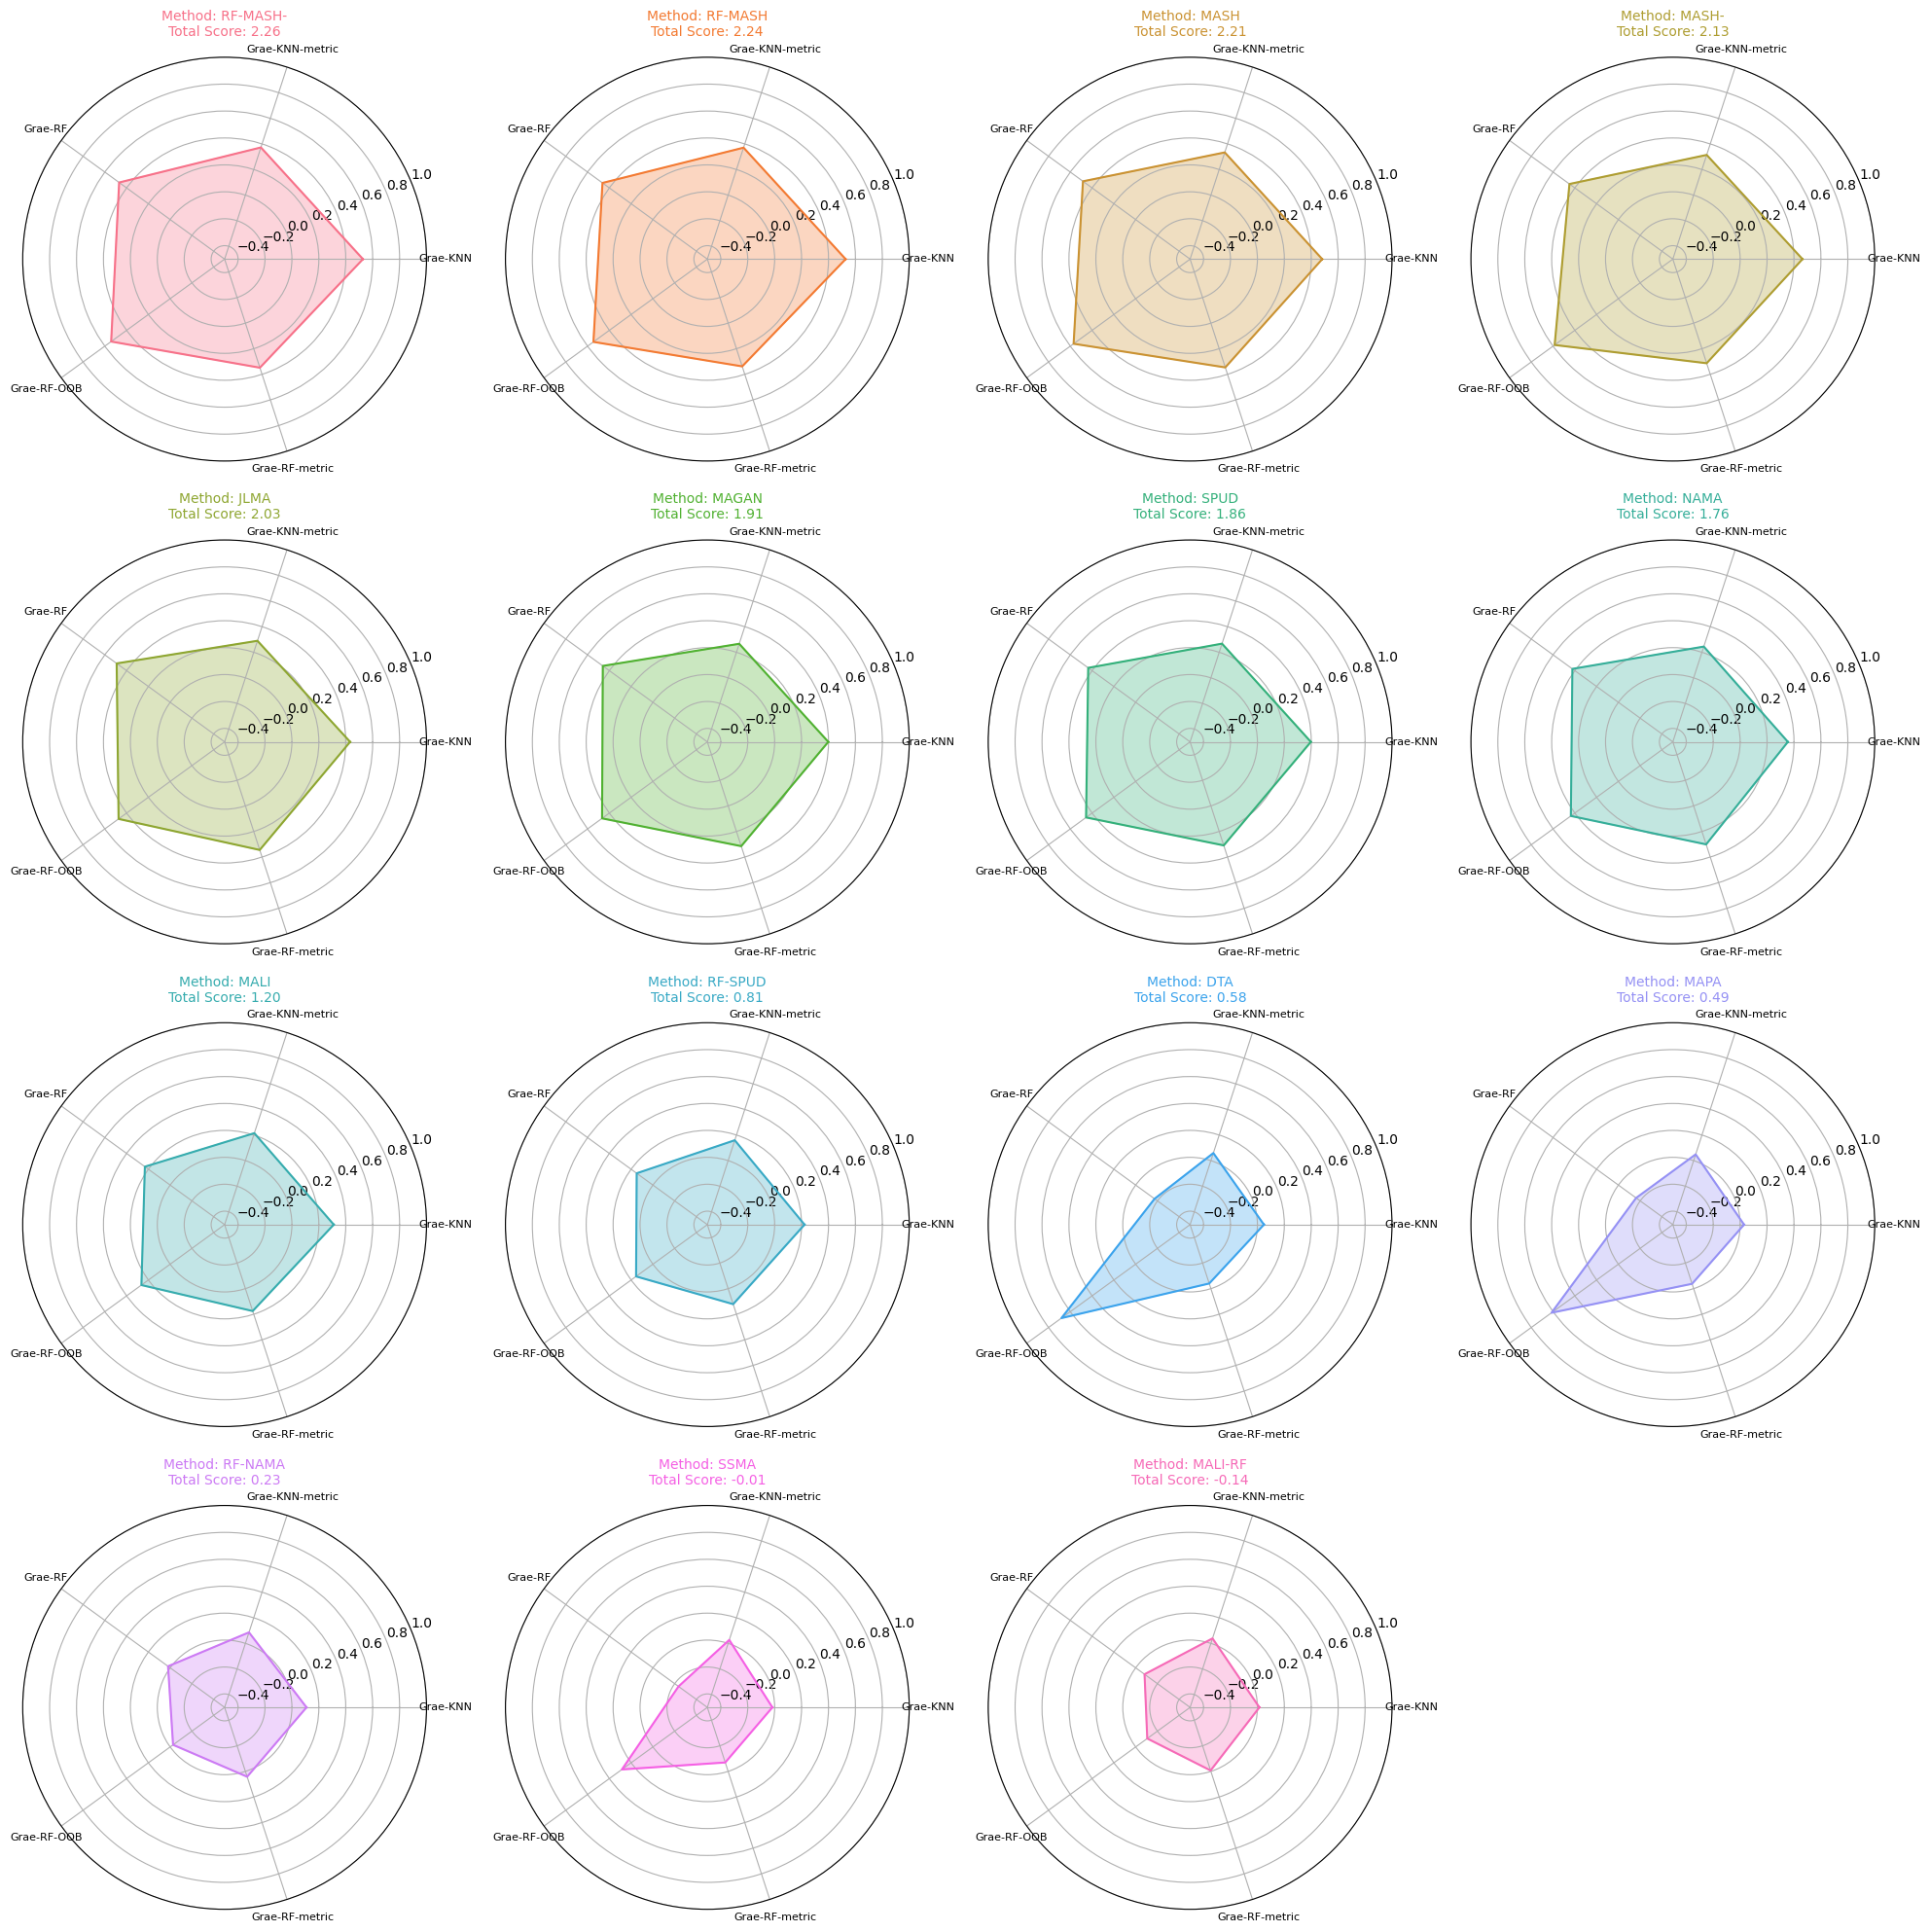

In [17]:
plot_radial(full_data, [#'CE', 'FOSCTTM', 'Random Forest OOB', 'Random Forest Emb', 'Nearest Neighbor',
                          #'Nearest Neighbor (F1 score or RMSE)', 'Random Forest (F1 score or RMSE)',
                          'Grae-KNN', 'Grae-KNN-metric', 'Grae-RF', 'Grae-RF-OOB', 'Grae-RF-metric'])

# Compare Grae to RF Extend

In [18]:
full_data.sample(2)

,method,csv_file,split,Percent_of_Anchors,CE,FOSCTTM,Random Forest OOB,Random Forest Emb,Nearest Neighbor,Nearest Neighbor (F1 score or RMSE),Random Forest (F1 score or RMSE),Combined_Metric,A_Classification_Score,B_Classification_Score,Grae-KNN,Grae-KNN-metric,Grae-RF,Grae-RF-OOB,Grae-RF-metric
562,RF-SPUD,AutoMPG,turn,0.3,0.804782,0.000141,0.807593,0.748905,0.745853,0.489314,0.485642,0.804642,0.875136,0.875136,0.842307,0.362826,0.818503,0.794050,0.388818
242,SSMA,EnergyEfficiency,random,0.3,0.286148,0.389446,0.313766,0.284728,0.343391,0.763524,0.815713,-0.103298,0.941495,0.885330,-0.016064,1.019043,-0.194060,0.452146,1.104450


In [19]:
group_df = full_data.drop(columns = ["csv_file", "split", "Percent_of_Anchors", "A_Classification_Score", "B_Classification_Score"]).groupby(by = "method").mean()
group_df#.plot( )

,CE,FOSCTTM,Random Forest OOB,Random Forest Emb,Nearest Neighbor,Nearest Neighbor (F1 score or RMSE),Random Forest (F1 score or RMSE),Combined_Metric,Grae-KNN,Grae-KNN-metric,Grae-RF,Grae-RF-OOB,Grae-RF-metric
method,,,,,,,,,,,,,
DTA,0.526154,0.158615,0.504363,0.363444,0.415754,0.728815,0.727622,0.367539,0.048444,0.941068,-0.173486,0.681460,1.040180
JLMA,0.186421,0.233162,0.457888,0.437567,0.423654,0.715125,0.683981,-0.046741,0.432510,0.710533,0.491310,0.473705,0.655668
MAGAN,-0.118300,0.003965,0.452572,0.471638,0.383893,0.743620,0.677896,-0.122265,0.398445,0.733898,0.460010,0.466873,0.685366
MALI,0.178812,0.170847,0.190649,0.161692,0.233467,0.832154,0.869305,0.007964,0.310919,0.785421,0.232252,0.263916,0.824874
MALI-RF,-0.220123,0.158884,-0.132888,-0.145124,-0.057266,0.994242,1.031648,-0.379007,0.014820,0.961203,-0.081615,-0.106606,1.007045
MAPA,0.426809,0.177010,0.380295,0.265833,0.301906,0.796659,0.789241,0.249799,0.029179,0.951236,-0.162821,0.614079,1.037673
MASH,0.581922,0.058989,0.573247,0.512018,0.520125,0.632516,0.619147,0.522933,0.481768,0.666509,0.483647,0.569766,0.654049
MASH-,0.587125,0.086638,0.588372,0.518150,0.479061,0.670334,0.634792,0.500488,0.463203,0.686039,0.449453,0.585361,0.686679
NAMA,-0.098088,0.045877,0.380997,0.383521,0.325752,0.771800,0.721855,-0.143965,0.354679,0.755690,0.422478,0.436465,0.699235


In [20]:
group_df.columns, group_df.index

(Index(['CE', 'FOSCTTM', 'Random Forest OOB', 'Random Forest Emb',
        'Nearest Neighbor', 'Nearest Neighbor (F1 score or RMSE)',
        'Random Forest (F1 score or RMSE)', 'Combined_Metric', 'Grae-KNN',
        'Grae-KNN-metric', 'Grae-RF', 'Grae-RF-OOB', 'Grae-RF-metric'],
       dtype='object'),
 Index(['DTA', 'JLMA', 'MAGAN', 'MALI', 'MALI-RF', 'MAPA', 'MASH', 'MASH-',
        'NAMA', 'RF-MASH', 'RF-MASH-', 'RF-NAMA', 'RF-SPUD', 'SPUD', 'SSMA'],
       dtype='object', name='method'))

In [21]:
rf_extend = group_df[['Random Forest OOB', 'Random Forest Emb', 'Nearest Neighbor', 'Nearest Neighbor (F1 score or RMSE)', 'Random Forest (F1 score or RMSE)']]  
grae = group_df[['Grae-KNN', 'Grae-KNN-metric', 'Grae-RF', 'Grae-RF-OOB', 'Grae-RF-metric']]

In [22]:
dif_values = rf_extend.values - grae.values

diff_df = pd.DataFrame(dif_values, index = group_df.index, columns = rf_extend.columns)
diff_df["Nearest Neighbor (F1 score or RMSE)"] = diff_df["Nearest Neighbor (F1 score or RMSE)"] * -1
diff_df["Random Forest (F1 score or RMSE)"] = diff_df["Random Forest (F1 score or RMSE)"] * -1 #To ensure that they are consistent on same side.

diff_df

,Random Forest OOB,Random Forest Emb,Nearest Neighbor,Nearest Neighbor (F1 score or RMSE),Random Forest (F1 score or RMSE)
method,,,,,
DTA,0.455920,-0.577624,0.589240,-0.047354,0.312557
JLMA,0.025378,-0.272966,-0.067656,-0.241420,-0.028313
MAGAN,0.054127,-0.262260,-0.076117,-0.276747,0.007470
MALI,-0.120270,-0.623730,0.001216,-0.568238,-0.044431
MALI-RF,-0.147707,-1.106327,0.024349,-1.100848,-0.024603
MAPA,0.351116,-0.685403,0.464726,-0.182580,0.248432
MASH,0.091479,-0.154491,0.036478,-0.062751,0.034902
MASH-,0.125168,-0.167889,0.029608,-0.084973,0.051887
NAMA,0.026318,-0.372168,-0.096726,-0.335334,-0.022620


<Axes: xlabel='method'>

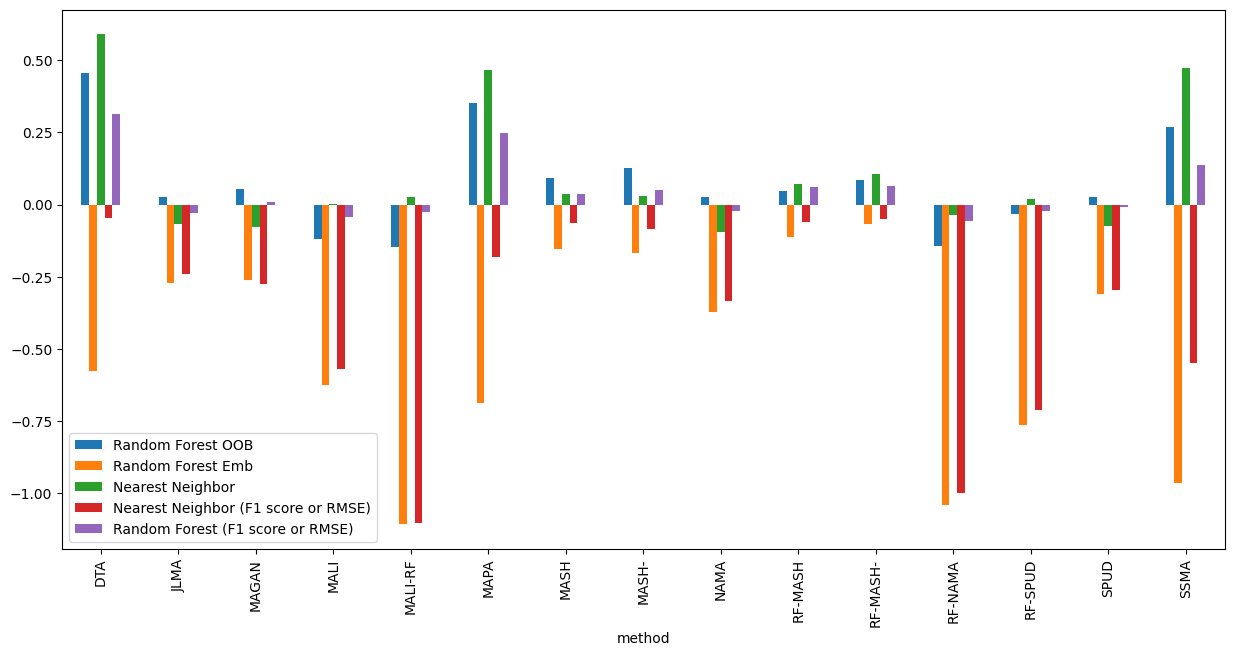

In [23]:
"""
Note that this below isn't really an assesment of how well each method did, but how different Grae is from the non-Grae
Also note that the RMSE is multiplied by -1 so that the bar is on the side where the method is more favorable for it
"""
diff_df.plot(kind = "bar", figsize=(15,7)) # Calculated Non-Grae verisons - Grae_versions

# Veiw Feature variance

In [24]:
reg_df = read_json_files_to_dataframe("/yunity/arusty/Graph-Manifold-Alignment/Results/RegressionData")

#Average out the random seeds
reg_df["CE"] = [np.mean(list(d.values())) for d in reg_df["CE"].values]
reg_df["FOSCTTM"] = [np.mean(list(d.values())) for d in reg_df["FOSCTTM"].values]
reg_df["Combined_Metric"] = reg_df["CE"] - reg_df["FOSCTTM"]
reg_df.sample(2)

,method,csv_file,split,Percent_of_Anchors,Best_Params,CE,FOSCTTM,Random Forest OOB,Random Forest Emb,Nearest Neighbor,Nearest Neighbor (F1 score or RMSE),Random Forest (F1 score or RMSE),GRAE,Parameter STD,Combined_Metric
1106,SPUD,ConcreteCompressiveStrength,distort,0.3,"{'knn': 2, 'OD_method': 'default', 'agg_method...",-0.280489,0.043236,"{'42': -0.039989908983389055, '1738': -0.06005...","{'42': -0.05589761682331451, '1738': -0.052913...","{'42': -0.01118803666854462, '1738': -0.020832...","{'42': 0.9662464942400777, '1738': 0.998748095...","{'42': 0.9873767001133309, '1738': 1.014319932...","{'42': {'RF-OOB': -0.026378690254907022, 'KNN'...","{'knn': 0.17132888047798875, 'OD_method': 0.00...",-0.323725
782,MAGAN,Automobile,even,0.3,{'learning_rate': 0.005},0.245152,0.001028,{'42': 0.6767712907580866},{'42': 0.6646489950423713},{'42': 0.6657208989390666},{'42': 0.4149350654512769},{'42': 0.4155998011928348},"{'42': {'RF-OOB': 0.7578661406458069, 'KNN': 0...",{},0.244124


### Spud Parameters on STD

In [25]:
spud_param_df = pd.DataFrame(list(reg_df[reg_df["method"] == "SPUD"]["Parameter STD"].values))
spud_param_df

,knn,OD_method,agg_method
0,0.293544,0.106728,0.328006
1,0.315521,0.136929,0.113630
2,0.299420,0.038904,0.179496
3,0.257186,0.017215,0.020762
4,0.251965,0.055214,0.303049
...,...,...,...
205,0.303843,0.137920,0.086527
206,0.245030,0.052678,0.133933
207,0.589315,0.178530,0.034385
208,0.222530,0.223938,0.006242


<Axes: >

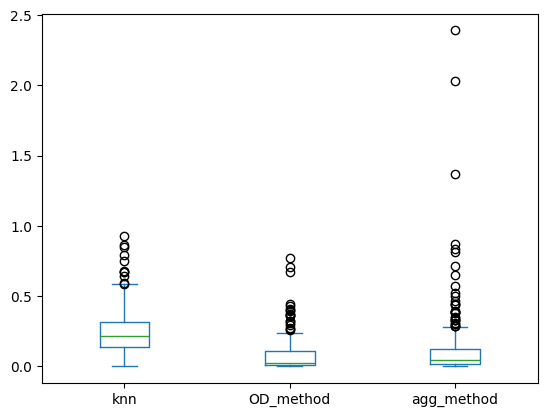

In [26]:
spud_param_df.plot(kind = "box") #This is showing how the std fluctuates between datasets

## MASH Parameters on STD

In [27]:
mash_minus_param_df = pd.DataFrame(list(reg_df[reg_df["method"] == "MASH-"]["Parameter STD"].values))
mash_minus_param_df

,knn,page_rank,DTM,density_normalization
0,0.091198,0.001743,0.056412,0.0
1,0.047943,0.000929,0.017838,0.0
2,0.069734,0.016474,0.033729,0.0
3,0.092486,0.003621,0.056183,0.0
4,0.051415,0.001235,0.009693,0.0
5,0.141639,0.008092,0.227741,0.0
6,0.191730,0.005466,0.008328,0.0
7,0.095779,0.125204,0.023997,0.0
8,0.165841,0.004503,0.056278,0.0
9,0.238521,0.004086,0.119055,0.0


<Axes: >

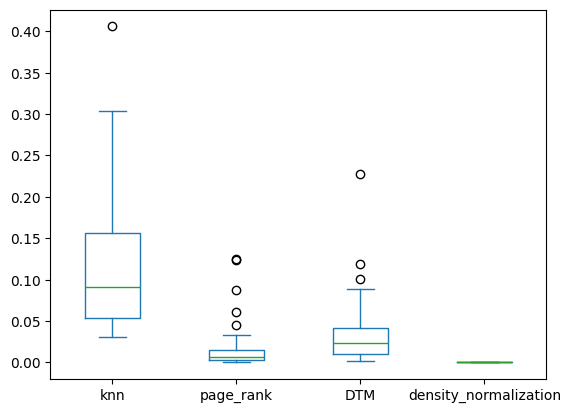

In [28]:
mash_minus_param_df.plot(kind = "box") #This is showing how the std fluctuates between datasets

In [29]:
mash_param_df = pd.DataFrame(list(reg_df[reg_df["method"] == "MASH"]["Parameter STD"].values))
mash_param_df

,connection_limit,threshold,epochs
0,0.000000,0.000000,0.000000e+00
1,0.000000,0.000000,0.000000e+00
2,0.000000,0.000000,0.000000e+00
3,0.000000,0.000000,0.000000e+00
4,0.034208,0.022954,1.110223e-16
5,0.000000,0.000000,0.000000e+00
6,0.006181,0.032061,0.000000e+00
7,0.000000,0.000000,1.387779e-17
8,0.000000,0.000000,0.000000e+00
9,0.000000,0.000000,1.110223e-16


<Axes: >

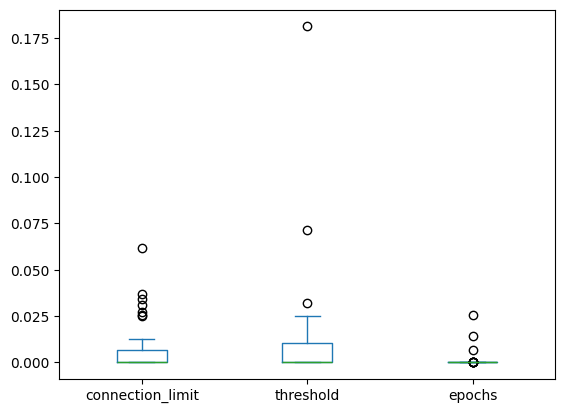

In [30]:
mash_param_df.plot(kind = "box") 